In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Absorbance Data

In [8]:
file = pd.read_csv('00 - Dataset/02 - Cleaning Results/a_data.csv')
df = file.drop(['Gender','AgeM','ECV','TPP','SC','OAE1','OAE1.4','OAE2','OAE2.8','OAE4','OverallPoF','Ear coded'], axis = 1)

#  Individual models for each feature/frequency


In [11]:
#Freq with OverallPoF
acc_score = []
lr_score = [] 

for freq in df:
    X = df[freq]
    y = file['OverallPoF']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    X_train = X_train.to_numpy().reshape(-1,1)
    X_test = X_test.to_numpy().reshape(-1,1)
    
    #Ridge
    model = LogisticRegression(penalty = 'l2',class_weight='balanced')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear',class_weight='balanced')

    #Elastic net
    #model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5,class_weight='balanced')
    
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    lr_score.append([freq,acc_score])
    #print(classification_report(y_test, y_pred))
    
    #ROC CURVES
    y_predict_proba = model.predict_proba(X_test)
    probabilities = np.array(y_predict_proba)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities, pos_label=1)
    roc_auc = auc(fpr, tpr)
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    #print(roc_auc)
    
    #plt.title('Receiver Operating Characteristic ' + freq)
    #plt.plot(fpr,tpr)
    #plt.plot([0, 1], ls="--")
    #plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    
    #plt.show()
#lr_score.sort(key=lambda x:x[1])
lr_score

[['f226', 0.5833333333333334],
 ['f257', 0.5625],
 ['f280', 0.6041666666666666],
 ['f297', 0.625],
 ['f324', 0.625],
 ['f343', 0.5833333333333334],
 ['f363', 0.625],
 ['f385', 0.6458333333333334],
 ['f408', 0.6875],
 ['f432', 0.6666666666666666],
 ['f458', 0.6666666666666666],
 ['f471', 0.7083333333333334],
 ['f500', 0.7291666666666666],
 ['f514', 0.7291666666666666],
 ['f545', 0.7291666666666666],
 ['f561', 0.75],
 ['f577', 0.7708333333333334],
 ['f594', 0.7708333333333334],
 ['f629', 0.7708333333333334],
 ['f648', 0.7916666666666666],
 ['f667', 0.7916666666666666],
 ['f686', 0.8125],
 ['f707', 0.7916666666666666],
 ['f727', 0.7916666666666666],
 ['f749', 0.8333333333333334],
 ['f771', 0.8541666666666666],
 ['f793', 0.8541666666666666],
 ['f816', 0.8541666666666666],
 ['f840', 0.8541666666666666],
 ['f865', 0.8541666666666666],
 ['f890', 0.8541666666666666],
 ['f917', 0.8333333333333334],
 ['f943', 0.8333333333333334],
 ['f971', 0.8541666666666666],
 ['f1000', 0.8333333333333334],
 ['

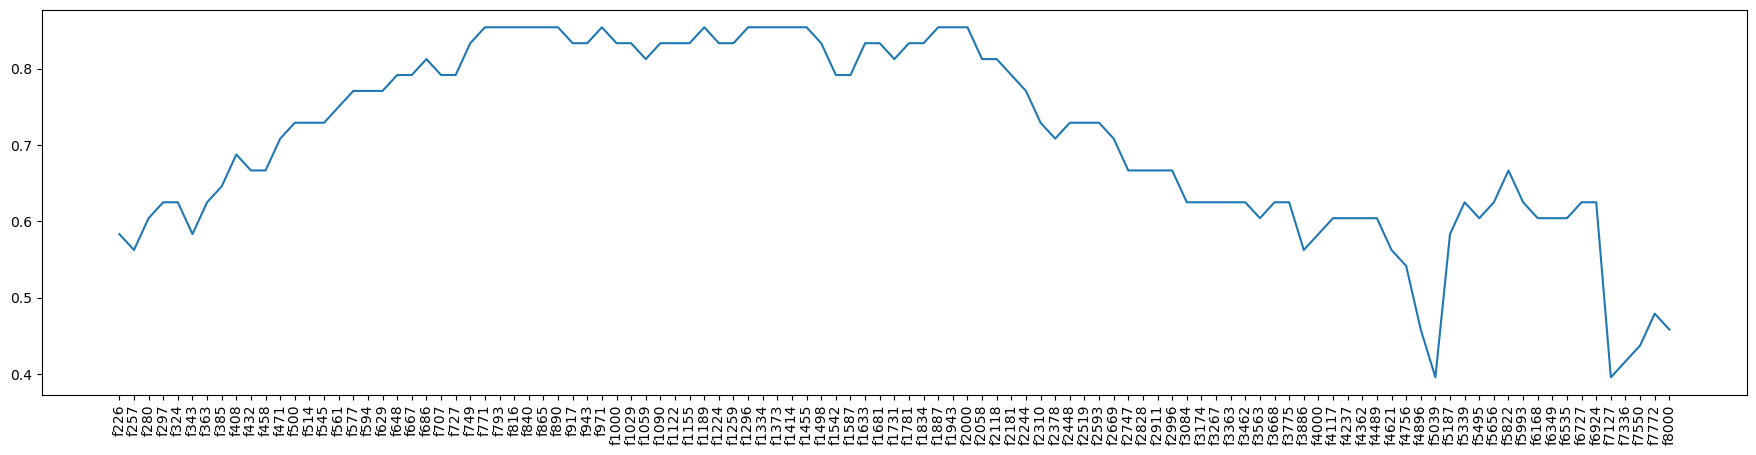

In [12]:
freq1 = [x for x,y in lr_score]
acc1 = [y for x,y in lr_score]

plt.figure(figsize=(22,5))
plt.plot(freq1,acc1)
plt.xticks(rotation=90)
plt.show()

## Individual with SMOTE

In [13]:
import warnings
warnings.filterwarnings("ignore")

#With SMOTE
X = df
y = file['OverallPoF']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
columns = X_train.columns

X_train1, y_train1 = os.fit_resample(X_train, y_train)
X_train1 = pd.DataFrame(data=X_train1,columns=columns)
y_train1 = pd.DataFrame(data=y_train1,columns=['OverallPoF'])

#print(X_train1.head(10)
smote_acc_score = []
smote_lr_score = [] 

for freq in X_train1:
    X1 = X_train1[freq]
    y_train1 = y_train1
    
    X1 = X1.values
    X1 = X1.reshape(-1,1)
    
    #Ridge
    model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    #model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)

    model.fit(X1, y_train1.values.ravel())
    
    score = model.score(X_test[[freq]], y_test)
    y_pred = model.predict(X_test[[freq]])
    smote_acc_score = accuracy_score(y_test, y_pred)
    smote_lr_score.append([freq,smote_acc_score])
    
    
#smote_lr_score.sort(key=lambda x:x[1])
smote_lr_score
# Default/Ridge regression
# ['f1731.', 0.9375]
# Elastic net

# Lasso
# ['f865', 0.8958333333333334],
# ['f890', 0.8958333333333334]]

[['f226', 0.5833333333333334],
 ['f257', 0.5625],
 ['f280', 0.6041666666666666],
 ['f297', 0.625],
 ['f324', 0.6041666666666666],
 ['f343', 0.5833333333333334],
 ['f363', 0.625],
 ['f385', 0.6458333333333334],
 ['f408', 0.6666666666666666],
 ['f432', 0.6666666666666666],
 ['f458', 0.6666666666666666],
 ['f471', 0.6875],
 ['f500', 0.7291666666666666],
 ['f514', 0.7291666666666666],
 ['f545', 0.7083333333333334],
 ['f561', 0.7708333333333334],
 ['f577', 0.7708333333333334],
 ['f594', 0.7708333333333334],
 ['f629', 0.7708333333333334],
 ['f648', 0.7708333333333334],
 ['f667', 0.7916666666666666],
 ['f686', 0.8125],
 ['f707', 0.7916666666666666],
 ['f727', 0.7708333333333334],
 ['f749', 0.8125],
 ['f771', 0.8333333333333334],
 ['f793', 0.8541666666666666],
 ['f816', 0.8541666666666666],
 ['f840', 0.8541666666666666],
 ['f865', 0.8541666666666666],
 ['f890', 0.8541666666666666],
 ['f917', 0.8333333333333334],
 ['f943', 0.8333333333333334],
 ['f971', 0.8541666666666666],
 ['f1000', 0.8541666

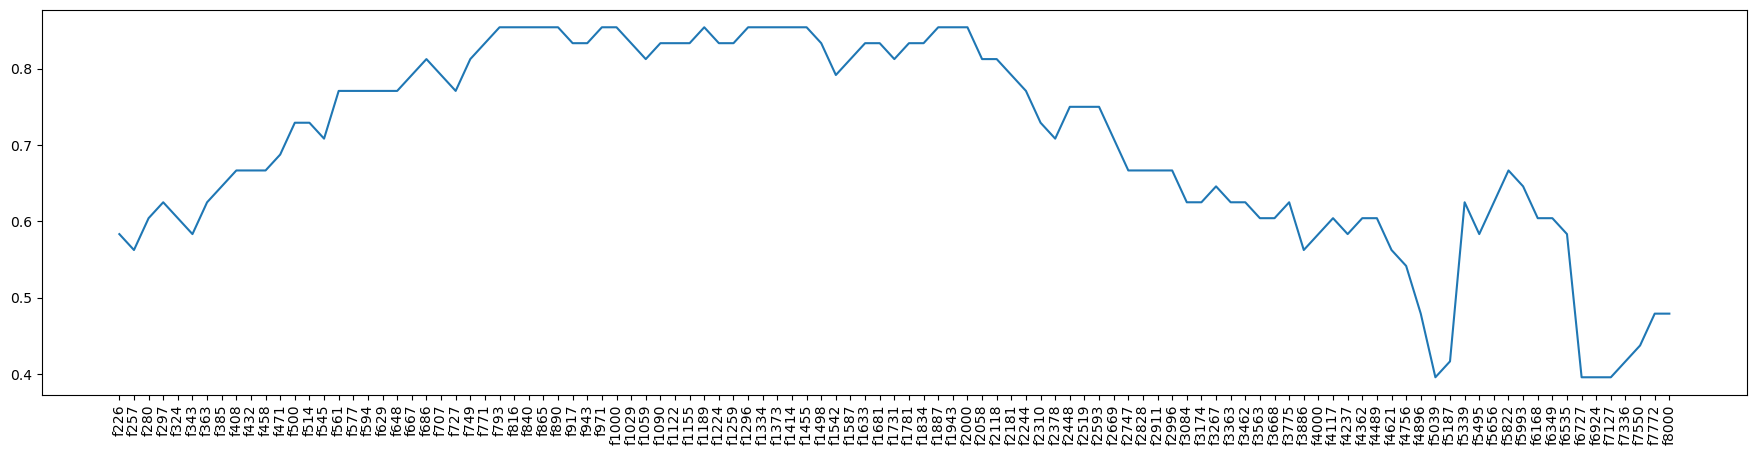

In [15]:
freq2 = [x for x,y in smote_lr_score]
acc2 = [y for x,y in smote_lr_score]

plt.figure(figsize=(22,5))
plt.plot(freq2,acc2)
plt.xticks(rotation=90)
plt.show()

## Individual with TomekLinks

In [19]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import TomekLinks
X = df
y = file['OverallPoF']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
#columns = X_train.columns

tl = TomekLinks(sampling_strategy = 'majority')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

X_tl, y_tl= tl.fit_resample(X_train, y_train)
#print(len(X_tl))
tomek_acc_score = []
tomek_lr_score = [] 

for freq in X_tl:
    X1 = X_tl[freq]
    y_tl = y_tl
    
    X1 = X1.values
    X1 = X1.reshape(-1,1)
    
    #Ridge
    model = LogisticRegression(penalty = 'l2')

    #Lasso
    #model = LogisticRegression(penalty = 'l1',solver='liblinear')

    #Elastic net
    #model = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio=0.5)
    
    #model = LogisticRegression()
    model.fit(X1, y_tl)
    
    score = model.score(X_test[[freq]], y_test)
    y_pred = model.predict(X_test[[freq]])
    tomek_acc_score = accuracy_score(y_test, y_pred)
    tomek_lr_score.append([freq,tomek_acc_score])
    
#tomek_lr_score.sort(key=lambda x:x[1])
tomek_lr_score

[['f226', 0.8541666666666666],
 ['f257', 0.8541666666666666],
 ['f280', 0.8541666666666666],
 ['f297', 0.8541666666666666],
 ['f324', 0.8541666666666666],
 ['f343', 0.8541666666666666],
 ['f363', 0.8541666666666666],
 ['f385', 0.8541666666666666],
 ['f408', 0.8541666666666666],
 ['f432', 0.8541666666666666],
 ['f458', 0.8541666666666666],
 ['f471', 0.8541666666666666],
 ['f500', 0.8541666666666666],
 ['f514', 0.8541666666666666],
 ['f545', 0.8541666666666666],
 ['f561', 0.8541666666666666],
 ['f577', 0.8541666666666666],
 ['f594', 0.8541666666666666],
 ['f629', 0.8541666666666666],
 ['f648', 0.8541666666666666],
 ['f667', 0.8541666666666666],
 ['f686', 0.8541666666666666],
 ['f707', 0.8541666666666666],
 ['f727', 0.8541666666666666],
 ['f749', 0.8541666666666666],
 ['f771', 0.8541666666666666],
 ['f793', 0.8541666666666666],
 ['f816', 0.8541666666666666],
 ['f840', 0.8541666666666666],
 ['f865', 0.8541666666666666],
 ['f890', 0.8541666666666666],
 ['f917', 0.8541666666666666],
 ['f943'

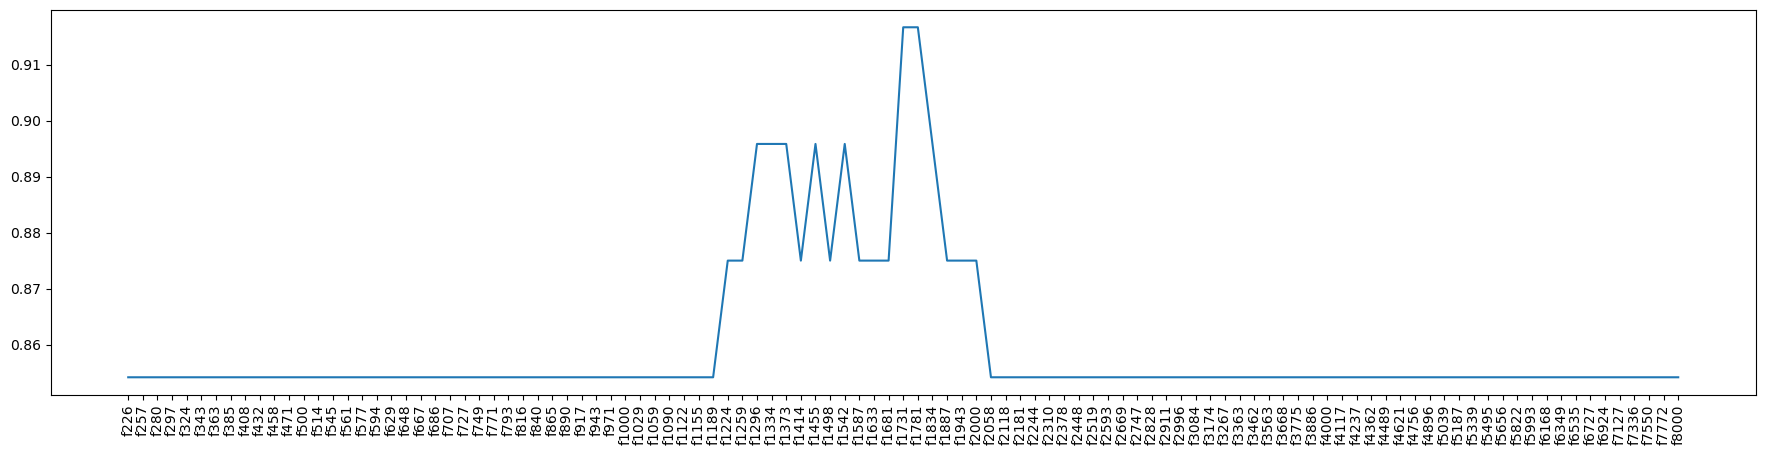

In [20]:
freq3 = [x for x,y in tomek_lr_score]
acc3 = [y for x,y in tomek_lr_score]

plt.figure(figsize=(22,5))
plt.plot(freq3,acc3)
plt.xticks(rotation=90)
plt.show()

# Using All Features

Feature: 0, Score: 0.11740
Feature: 1, Score: 0.07585
Feature: 2, Score: 0.05030
Feature: 3, Score: 0.07980
Feature: 4, Score: 0.15532
Feature: 5, Score: 0.21027
Feature: 6, Score: 0.20970
Feature: 7, Score: 0.14932
Feature: 8, Score: 0.06028
Feature: 9, Score: 0.00527
Feature: 10, Score: 0.03024
Feature: 11, Score: 0.03960
Feature: 12, Score: 0.02473
Feature: 13, Score: -0.03378
Feature: 14, Score: -0.08402
Feature: 15, Score: -0.09445
Feature: 16, Score: -0.05862
Feature: 17, Score: -0.07636
Feature: 18, Score: -0.12272
Feature: 19, Score: -0.15801
Feature: 20, Score: -0.19674
Feature: 21, Score: -0.18042
Feature: 22, Score: -0.19473
Feature: 23, Score: -0.24528
Feature: 24, Score: -0.29700
Feature: 25, Score: -0.30177
Feature: 26, Score: -0.28601
Feature: 27, Score: -0.28815
Feature: 28, Score: -0.31975
Feature: 29, Score: -0.35476
Feature: 30, Score: -0.36903
Feature: 31, Score: -0.37846
Feature: 32, Score: -0.44000
Feature: 33, Score: -0.50255
Feature: 34, Score: -0.53981
Feature:

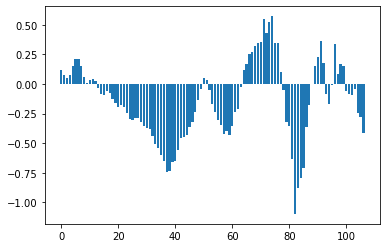

In [34]:
#all features together

x1 = df
y1= file['OverallPoF']

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)


allModel = LogisticRegression(class_weight='balanced')
allModel.fit(x_train, y_train)

importance = allModel.coef_[0]
listFeature=[]
# summarize feature importance
for i,v in enumerate(importance):
    listFeature.append(v)
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [35]:
score = allModel.score(x_test, y_test)
y_pred = allModel.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)

print(acc_score)

0.9027777777777778


In [36]:
import operator
freqKeys=list(df.columns)

    
d = {freqKeys[i]: listFeature[i] for i in range(len(freqKeys))}
sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))

In [37]:
sorted_d

{'f.3174.8021.': 0.5723342735612674,
 'f.2911.3064.': 0.5489687579291547,
 'f.3084.4217.': 0.5238596841464556,
 'f.2996.6142.': 0.4274961837725074,
 'f.5187.3582.': 0.3629964224081018,
 'f.2828.4271.': 0.3518442106950641,
 'f.3363.5857.': 0.3501372484903433,
 'f.3267.8309.': 0.3451632105285505,
 'f.2747.9073.': 0.34294599595005454,
 'f.5993.2283.': 0.33948783320890497,
 'f.2669.6797.': 0.3198592112082219,
 'f.2593.6791.': 0.27169327773570606,
 'f.2519.8421.': 0.2503414036831223,
 'f.5039.6842.': 0.22429232838791158,
 'f.343.4884.': 0.2102732114882941,
 'f.363.9133.': 0.20969720077327392,
 'f.5339.3594.': 0.17566021313213112,
 'f.6349.6042.': 0.17067596661910747,
 'f.2448.1071.': 0.1658708672798332,
 'f.324.2099.': 0.15531883653811282,
 'f.6535.6618.': 0.15147795146496454,
 'f.385.5527.': 0.14931726356522243,
 'f.4896.2142.': 0.14835634510128634,
 'f.2378.4142.': 0.11887677005485527,
 'f.226.0000.': 0.11739755781542799,
 'f.3462.1462.': 0.10218405079958698,
 'f.6168.8433.': 0.0873184047

# using feature selection

Feature: 0, Score: -2.98298
Feature: 1, Score: -2.88762
Feature: 2, Score: -1.13106
Feature: 3, Score: -0.67435
Feature: 4, Score: -0.25018
Feature: 5, Score: 0.07674
Feature: 6, Score: 0.26388
Feature: 7, Score: 0.49421
Feature: 8, Score: 0.29097
Feature: 9, Score: 0.00459
Feature: 10, Score: -0.12559
Feature: 11, Score: -0.00892
Feature: 12, Score: 0.34793


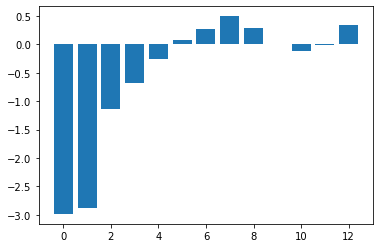

In [29]:
#all features together
#Feature Selection Variance Threshold
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

new_df = variance_threshold_selector(df, 0.04)
new_df

vt_acc_score = []
vt_lr_score = [] 

x1 = new_df
y1= file['OverallPoF']

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)


allModel = LogisticRegression(class_weight='balanced')
allModel.fit(x_train, y_train)

importance = allModel.coef_[0]
listFeature=[]

# summarize feature importance
for i,v in enumerate(importance):
    listFeature.append(v)
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [30]:
score = allModel.score(x_test, y_test)
y_pred = allModel.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)

print(acc_score)

0.9027777777777778


In [32]:
import operator
freqKeys=list(new_df.columns)

    
d = {freqKeys[i]: listFeature[i] for i in range(len(freqKeys))}
sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
sorted_d

{'f.5187.3582.': 0.49421120738515933,
 'f.5993.2283.': 0.34792832111361266,
 'f.5339.3594.': 0.29096955066882807,
 'f.5039.6842.': 0.2638820989742728,
 'f.4896.2142.': 0.07673973622287367,
 'f.5495.8146.': 0.004593920562366333,
 'f.5822.6127.': -0.008919205249036307,
 'f.5656.8542.': -0.1255887343136349,
 'f.4756.8285.': -0.25017558861503575,
 'f.4621.4108.': -0.6743520492019927,
 'f.4489.8482.': -1.1310562003701274,
 'f.1259.9210.': -2.887617412349594,
 'f.1224.0535.': -2.9829834604008822}